In [235]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from IPython.display import display,Markdown

In [236]:
epl = pd.read_csv('EPL.csv')
print(epl.info())
print(epl.head())

epl_condensed = epl[['Season','Team','Pos','Pts','GF','GD', 'Qualification or relegation']]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Season                       440 non-null    object
 1   Pos                          440 non-null    int64 
 2   Team                         440 non-null    object
 3   Pld                          440 non-null    int64 
 4   W                            440 non-null    int64 
 5   D                            440 non-null    int64 
 6   L                            440 non-null    int64 
 7   GF                           440 non-null    int64 
 8   GA                           440 non-null    int64 
 9   GD                           440 non-null    int64 
 10  Pts                          440 non-null    int64 
 11  Qualification or relegation  440 non-null    object
dtypes: int64(9), object(3)
memory usage: 41.4+ KB
None
    Season  Pos               Team  Pld  

In [237]:
# Create update_result function that updates values to shortened versions and name it 
def update_result(result):
    if 'Champions League' in result:
        result = 'Champions League'
    elif 'Europa' in result or 'UEFA' in result:
        result = 'Europa'
    elif 'Relegation' in result:
        result = 'Relegated'
    else:
        result = '-'
    return result

In [238]:
epl_condensed = epl_condensed.rename(columns={'Qualification or relegation':'Result'})
epl_condensed['Result'] = epl_condensed['Result'].apply(update_result)
print(epl_condensed['Result'].value_counts())

-                   220
Champions League     89
Europa               68
Relegated            63
Name: Result, dtype: int64


In [239]:
cl_qual =epl_condensed[epl_condensed.Result == 'Champions League']
cl_qual_stats = cl_qual.groupby('Season').agg({'Pos':'max','Pts':'min','GD':'min'})
print(cl_qual_stats)

         Pos  Pts  GD
Season               
2000-01    3   69  25
2001-02    4   71  22
2002-03    4   67  15
2003-04    4   60  18
2004-05    5   58  -1
2005-06    4   67  32
2006-07    4   68  28
2007-08    4   76  39
2008-09    4   72  31
2009-10    4   70  26
2010-11    4   68  27
2011-12    6   64  19
2012-13    4   73  32
2013-14    4   79  27
2014-15    4   70  25
2015-16    4   66  29
2016-17    6   69  25
2017-18    4   75  38
2018-19    4   71  24
2019-20    4   66  15
2020-21    4   67  22
2021-22    4   71  29


In [240]:
eu_qual =epl_condensed[epl_condensed.Result == 'Europa']
eu_qual_stats = eu_qual.groupby('Season').agg({'Pos':'max','Pts':'min','GD':'min'})
print(eu_qual_stats)

         Pos  Pts  GD
Season               
2000-01    6   61  15
2001-02   18   36 -23
2002-03    9   51  -7
2003-04   11   48  -8
2004-05    7   55   5
2005-06    9   55  -3
2006-07    7   56  -5
2007-08   11   46  -8
2008-09    7   53   5
2009-10    7   63  13
2010-11   18   39 -21
2011-12    8   52   5
2012-13   18   36 -26
2013-14   16   37 -15
2014-15   12   47  -3
2015-16    7   62  14
2016-17    7   61  18
2017-18    7   54  -3
2018-19    7   57   1
2019-20    8   56   8
2020-21    7   62  15
2021-22    7   56   0


In [241]:
epl_winners = epl_condensed[epl_condensed['Pos']==1]
epl_winners = epl_winners.reset_index(drop=True)

relegation_zone = epl_condensed[epl_condensed['Pos']==18]
relegation_zone = relegation_zone.reset_index(drop=True)

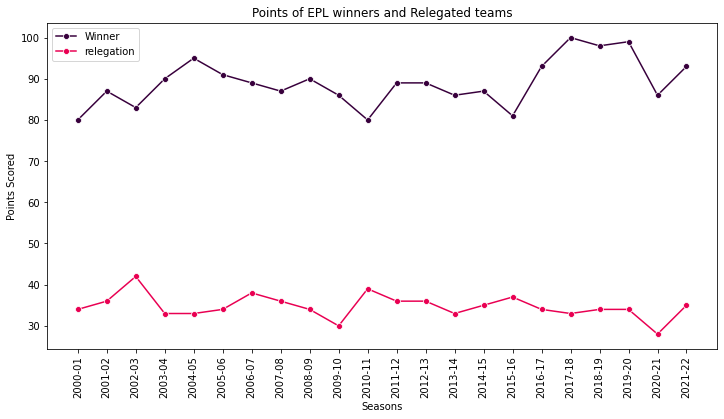

In [242]:
plt.figure(figsize=(12,6))

sns.lineplot(x='Season', y='Pts', data=epl_winners, marker='o', color='#38003c' , label='Winner')
sns.lineplot(x='Season', y='Pts', data=relegation_zone, marker='o', color='#e90052' , label='relegation')

plt.xticks(rotation=90)
plt.title("Points of EPL winners and Relegated teams")
plt.xlabel('Seasons')
plt.ylabel('Points Scored')

plt.show()

In [243]:
team_counts = epl_condensed['Team'].value_counts()

euro_ids = epl_condensed['Result'].isin(['Europa','Champions League'])
euro_year_counts = epl_condensed[euro_ids]['Team'].value_counts()


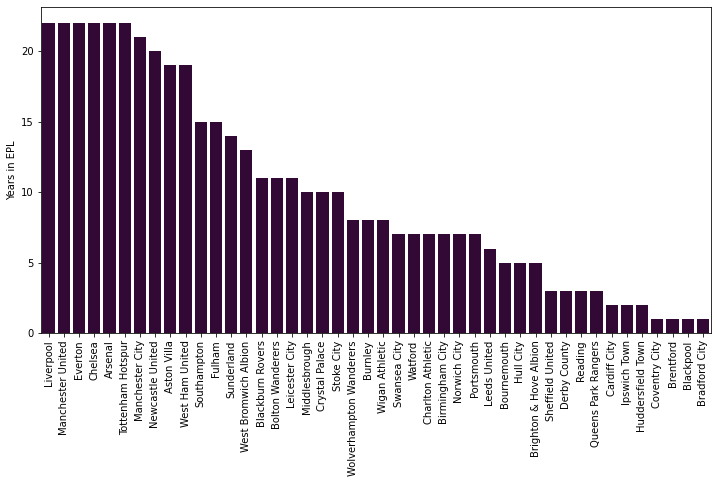

In [244]:
plt.figure(figsize=(12,6))
sns.barplot(x=team_counts.index,y=team_counts.values, color='#38003c')
plt.ylabel('Years in EPL')
plt.xticks(rotation=90)
plt.show()

<Figure size 864x432 with 0 Axes>

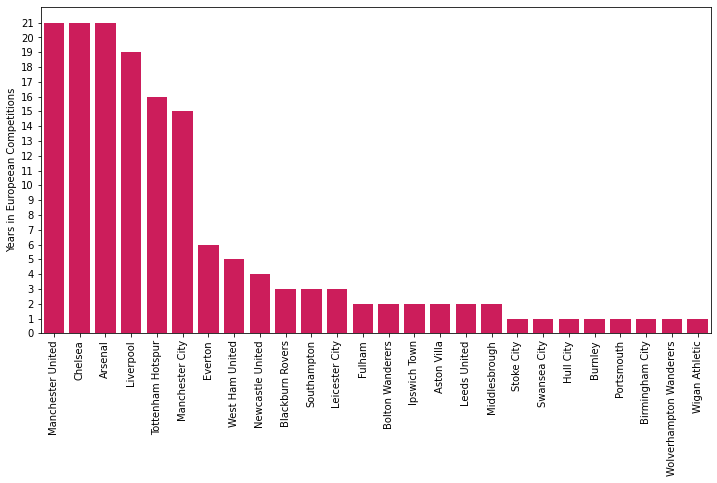

In [245]:
plt.figure(figsize=(12,6))
plt.figure(figsize=(12,6))
sns.barplot(x=euro_year_counts.index,y=euro_year_counts.values, color='#e90052',label='Years in Europe')
plt.ylabel('Years in Europeean Competitions')
plt.xticks(rotation=90)
plt.yticks(range(0,22,1))
plt.show()
